In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('max_columns', 500)


from fredapi import Fred

In [2]:
fred_key = "e7b8da0f6d2772f6ad08925041e468d0"

## 1.create the fred object

In [3]:
fred = Fred(api_key = fred_key)

In [4]:
fred

## 2.Search for econominc data

In [7]:
sp_search = fred.search('S&P',order_by='popularity')

In [9]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-04-28,2023-04-28,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-04-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-04-27 08:42:04-05:00,96,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-04-28,2023-04-28,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-02-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-04-25 08:13:02-05:00,91,"For more information regarding the index, plea..."
SP500,SP500,2023-04-28,2023-04-28,S&P 500,2013-04-29,2023-04-27,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-04-27 19:10:50-05:00,84,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-04-28,2023-04-28,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-04-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-04-27 08:42:08-05:00,84,This data represents the effective yield of th...
CSUSHPISA,CSUSHPISA,2023-04-28,2023-04-28,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-02-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-04-25 08:13:02-05:00,83,"For more information regarding the index, plea..."


# 3. Pull row Data and plot

In [11]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'sp500'}>

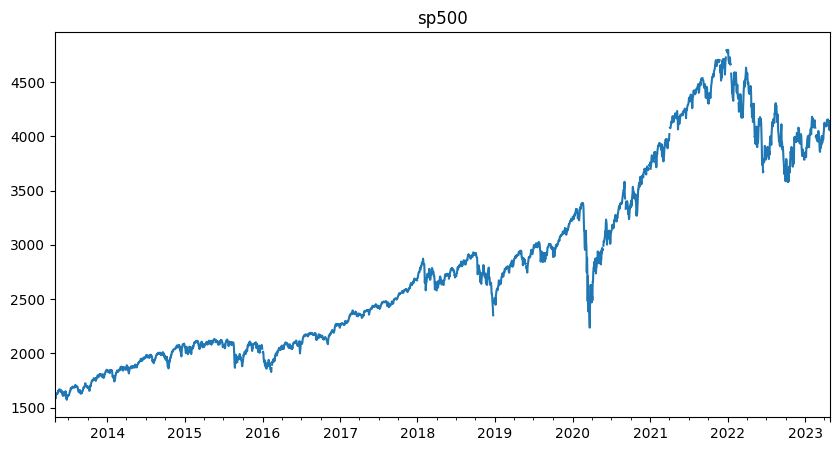

In [13]:
sp500.plot(figsize=(10,5), title="sp500")

# 4. Pull and Join multiple data series

In [15]:
uemp_result = fred.search('unemployement')

In [19]:
unrate = fred.get_series(series_id="unrate")

In [20]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2022-11-01    3.6
2022-12-01    3.5
2023-01-01    3.4
2023-02-01    3.6
2023-03-01    3.5
Length: 903, dtype: float64

<Axes: >

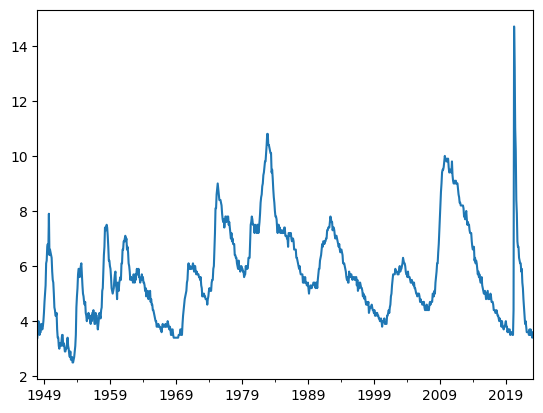

In [21]:
unrate.plot()

In [29]:
unemp_df = fred.search('unemployment rate state',filter=('frequency','Monthly'))

In [18]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-04-28,2023-04-28,Unemployment Rate,1948-01-01,2023-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-04-07 07:44:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-04-28,2023-04-28,Unemployment Rate,1948-01-01,2023-03-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-04-07 07:43:02-05:00,57,The unemployment rate represents the number of...
NROU,NROU,2023-04-28,2023-04-28,Noncyclical Rate of Unemployment,1949-01-01,2033-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-03-21 15:19:03-05:00,70,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2023-04-28,2023-04-28,Continued Claims (Insured Unemployment),1967-01-07,2023-04-15,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-04-27 07:48:05-05:00,76,"Continued claims, also referred to as insured ..."
CCNSA,CCNSA,2023-04-28,2023-04-28,Continued Claims (Insured Unemployment),1967-01-07,2023-04-15,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2023-04-27 07:48:09-05:00,34,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN090030000000003A,LAUCN090030000000003A,2023-04-28,2023-04-28,"Unemployment Rate in Hartford County, CT",1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:57:42-05:00,0,These data come from the Current Population Su...
LAUCN120310000000003A,LAUCN120310000000003A,2023-04-28,2023-04-28,"Unemployment Rate in Duval County, FL",1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:57:35-05:00,0,These data come from the Current Population Su...
LAUCN130330000000003A,LAUCN130330000000003A,2023-04-28,2023-04-28,"Unemployment Rate in Burke County, GA",1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 11:05:35-05:00,0,These data come from the Current Population Su...
